In [288]:
import pandas as pd
pd.set_option('display.max_columns',None)
import math
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,accuracy_score
from statsmodels.graphics.api import qqplot,influence_plot
from pickle import dump

## 1.Loading Data

In [233]:
cars_data = pd.read_csv('Datasets/ToyotaCorolla.csv')
cars_data.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0


## 2.Data Analysis

In [4]:
cars_data.shape

(1436, 38)

In [5]:
cars_data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [6]:
cars_data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

## 3.Data processing

In [13]:
[x for x in cars_data.columns if cars_data[x].dtypes == 'O']

['Model', 'Fuel_Type', 'Color']

In [16]:
cars_data['Model'].nunique()

372

In [234]:
#deleting 'model' feature
cars_data = cars_data.drop(labels=('Model'),axis=1)

In [20]:
cars_data.head(3)

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [22]:
cars_data['Fuel_Type'].nunique()

3

In [235]:
lbl_encoder = LabelEncoder()
x = lbl_encoder.fit_transform(cars_data['Fuel_Type'])
x = pd.DataFrame(data=x,columns=['Fuel_Type'])
cars_data['Fuel_Type'] = x
cars_data['Fuel_Type'].head()

0    1
1    1
2    1
3    1
4    1
Name: Fuel_Type, dtype: int64

In [236]:
toyota_data1 = cars_data.loc[:,('Price','Age_08_04','KM',
                                'Fuel_Type','Automatic','cc','Doors','Cylinders','Gears','Quarterly_Tax','Weight')]
toyota_data1.head()

,Price,Age_08_04,KM,Fuel_Type,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,1,0,2000,3,4,5,210,1165
1,13750,23,72937,1,0,2000,3,4,5,210,1165
2,13950,24,41711,1,0,2000,3,4,5,210,1165
3,14950,26,48000,1,0,2000,3,4,5,210,1165
4,13750,30,38500,1,0,2000,3,4,5,210,1170


In [40]:
toyota_data1['Cylinders'].nunique()

1

In [41]:
toyota_data1['cc'].nunique()

13

In [47]:
toyota_data1['Gears'].nunique()

4

In [237]:
toyota_data1.drop(labels=('Cylinders'),axis=1,inplace=True)

In [112]:
toyota_data1.head()

,Price,Age_08_04,KM,Fuel_Type,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,1,0,2000,3,5,210,1165
1,13750,23,72937,1,0,2000,3,5,210,1165
2,13950,24,41711,1,0,2000,3,5,210,1165
3,14950,26,48000,1,0,2000,3,5,210,1165
4,13750,30,38500,1,0,2000,3,5,210,1170


In [48]:
toyota_data1.isna().sum()

Price            0
Age_08_04        0
KM               0
Fuel_Type        0
Automatic        0
cc               0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

### aplying stanadrd scalar to data

In [238]:
std_sclr = StandardScaler()
col = [x for x in toyota_data1.columns if x != 'Price']
toyota_data1[col] = std_sclr.fit_transform(toyota_data1[col])
toyota_data1.isna().sum()

Price            0
Age_08_04        0
KM               0
Fuel_Type        0
Automatic        0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

### Checking for outliers using box plot

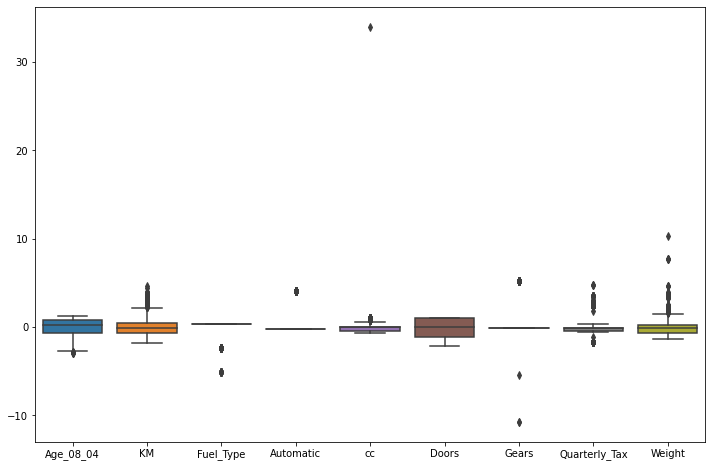

In [239]:
plt.figure(figsize=(12,8))
sns.boxplot(data=toyota_data1.iloc[:,1:])
plt.show()

#seems like our daa consists of outliers

### seperating train and test data

In [152]:
toyota_data1.shape

(1436, 10)

In [240]:
train_data = toyota_data1.iloc[:1221,:]
train_data.tail()

,Price,Age_08_04,KM,Fuel_Type,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
1216,8500,0.755797,0.462235,-2.337868,-0.242893,0.997419,1.014941,-0.140425,2.380619,1.188466
1217,8250,1.293619,0.454260,0.354336,-0.242893,0.054555,1.014941,-0.140425,-0.051626,-0.046740
1218,9450,0.755797,0.451726,0.354336,4.117038,0.054555,-1.085139,-0.140425,-0.051626,0.143291
1219,7950,0.917144,0.444525,0.354336,-0.242893,0.054555,-1.085139,-0.140425,-0.440785,-0.426804
1220,7900,0.755797,0.439191,0.354336,-0.242893,0.054555,-1.085139,-0.140425,-0.051626,-0.331788


In [241]:
test_data = toyota_data1.iloc[1221:,:]
test_data.head()

,Price,Age_08_04,KM,Fuel_Type,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
1221,8500,0.917144,0.438870,0.354336,-0.242893,0.054555,-1.085139,-0.140425,-0.440785,-0.426804
1222,8250,1.239837,0.438284,0.354336,-0.242893,0.054555,1.014941,-0.140425,-0.051626,-0.046740
1223,8250,1.078490,0.425108,0.354336,-0.242893,0.054555,1.014941,-0.140425,-0.051626,-0.046740
1224,8950,0.917144,0.423241,0.354336,-0.242893,0.054555,-0.035099,-0.140425,-0.440785,-0.711851
1225,7950,0.970926,0.415800,0.354336,-0.242893,0.054555,-1.085139,-0.140425,-0.440785,-0.426804


## 4.Assumption check
### 4.1 Linearity check

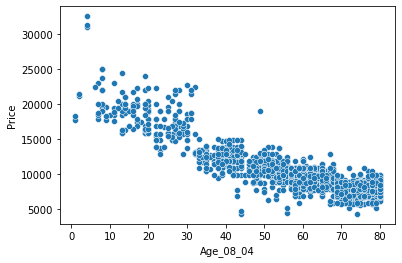

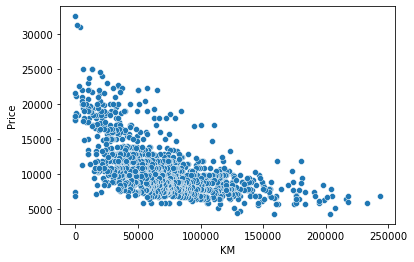

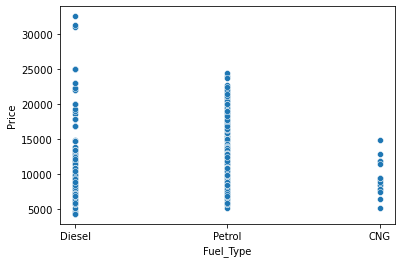

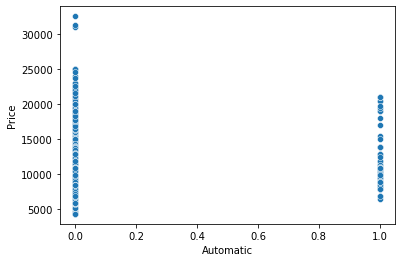

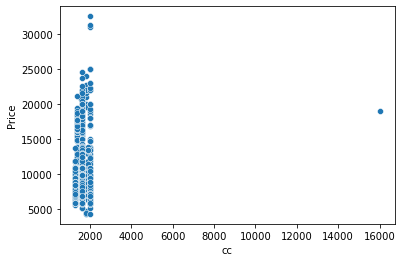

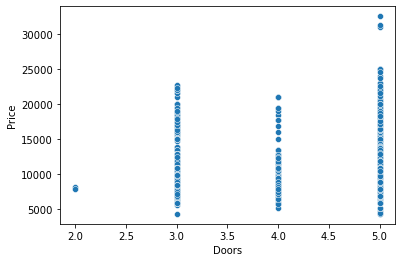

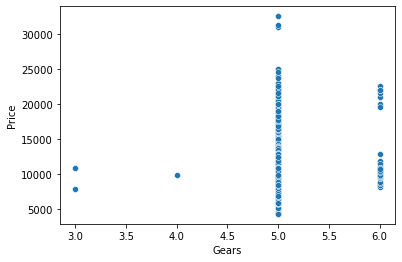

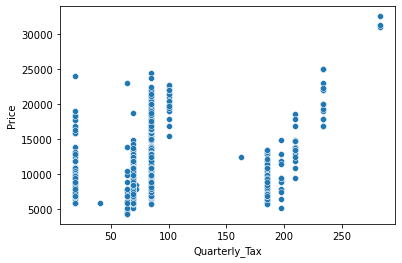

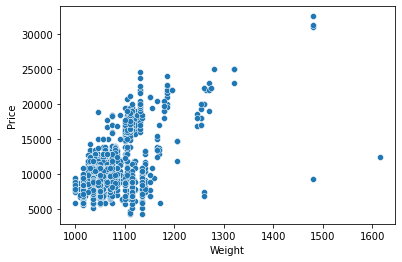

In [242]:

x = np.linspace( 0,10 )

for i in toyota_data1.columns:
    if i != 'Price':
        plt.figure()
        sns.scatterplot(x=data[i],y=toyota_data1['Price'])   
plt.show()

## 4.2 Multicoliniearity check

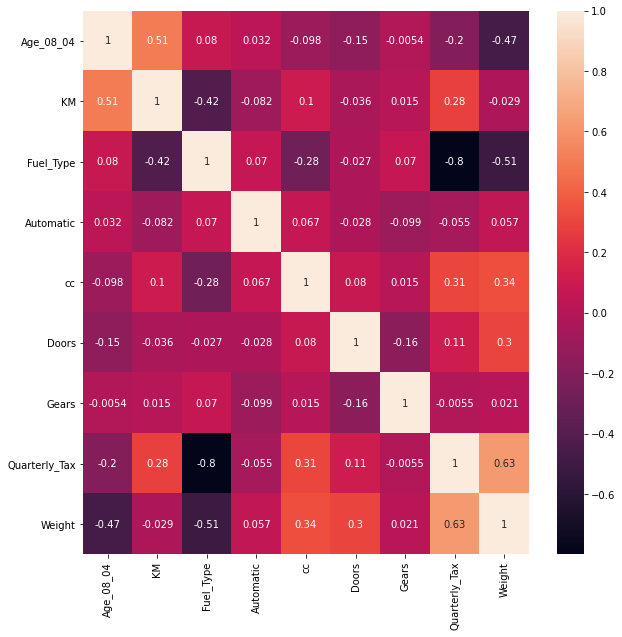

In [243]:
plt.figure(figsize=(10,10))
sns.heatmap(toyota_data1.iloc[:,1:].corr(),annot=True)
plt.show()

#### lets see the VIF of all predictors

In [244]:
def calVif(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    print(vif)
    
calVif(toyota_data1.iloc[:,1:])

       Variables       VIF
0      Age_08_04  1.917399
1             KM  1.922182
2      Fuel_Type  3.317592
3      Automatic  1.061566
4             cc  1.160977
5          Doors  1.185887
6          Gears  1.076055
7  Quarterly_Tax  3.413702
8         Weight  2.432009


**VIF of all the predicors < 5 which is acceptable**

## 5.Model selection

In [245]:
x = 0
input_var = ''
for i in toyota_data1.columns:
    if i != 'Price':
        if x == 0:
            input_var = input_var+i
        else:
            input_var = input_var+'+'+i
            
        model_1 = ols('Price~'+input_var,data).fit()
        print(input_var + ' Model')
        print('Pvalue       : ', model_1.pvalues[1])
        print('r squared    :',model_1.rsquared)
        print('adj r squared:',model_1.rsquared_adj)
        print('aic          :',model_1.aic)
        print('bic          :',model_1.bic)
        print('*************************************************')
        x = x+1

Age_08_04 Model
Pvalue       :  0.0
r squared    : 0.7684108996825327
adj r squared: 0.7682494010072765
aic          : 25516.97057066566
bic          : 25527.509804164878
*************************************************
Age_08_04+KM Model
Pvalue       :  0.0
r squared    : 0.789976321405393
adj r squared: 0.7896831969411995
aic          : 25378.609608696705
bic          : 25394.41845894553
*************************************************
Age_08_04+KM+Fuel_Type Model
Pvalue       :  0.030551458137005987
r squared    : 0.7928896554398609
adj r squared: 0.79231073064724
aic          : 25362.550752474042
bic          : 25388.898836222084
*************************************************
Age_08_04+KM+Fuel_Type+Automatic Model
Pvalue       :  0.02311859021070675
r squared    : 0.7950095339065609
adj r squared: 0.7942927840251153
aic          : 25349.776831866133
bic          : 25381.39453236378
*************************************************
Age_08_04+KM+Fuel_Type+Automatic+cc Model
Pval

**model with Age_08_04+KM+Fuel_Type+Automatic+cc+Doors+Cylinders+Gears+Quarterly_Tax+Weight as predicotr
gives a adj r square of 86**

## 6.Model building and training

In [247]:
toyota_price_pred = ols(formula='Price~Age_08_04+KM+Fuel_Type+Automatic+cc+Doors+Gears+Quarterly_Tax+Weight',
                        data=train_data).fit()

## 7.Model testing and evaluation

In [248]:
y_pred1 = toyota_price_pred.predict(test_data.iloc[:,1:])


In [249]:
mean_absolute_error(test_data['Price'],y_pred1)

828.1243577402703

In [250]:
mean_absolute_percentage_error(test_data['Price'],y_pred1)

0.10228486712042982

## 8.1 Normality test for residuals

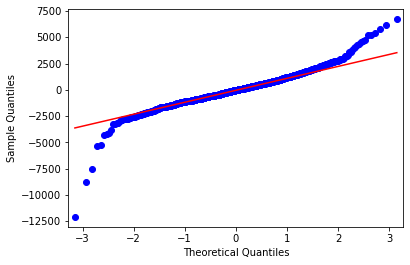

In [251]:
plot = qqplot(toyota_price_pred.resid,line='q')
plt.show()

## 8.2 Homascedasticity check fro constant varience of residuals

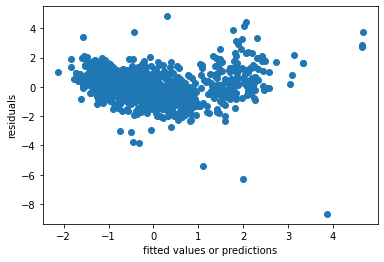

In [252]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(toyota_price_pred.fittedvalues),get_standardized_values(toyota_price_pred.resid))
plt.xlabel('fitted values or predictions')
plt.ylabel('residuals')
plt.show()

## model improvement,deleted high influence datapoints

In [253]:
toyota_price_pred1 = ols(formula='Price~Age_08_04+KM+Fuel_Type+Automatic+cc+Doors+Gears+Quarterly_Tax+Weight',
                        data=train_data).fit()
influnce_data1 = toyota_price_pred1.get_influence()
(c,_) = influnce_data.cooks_distance

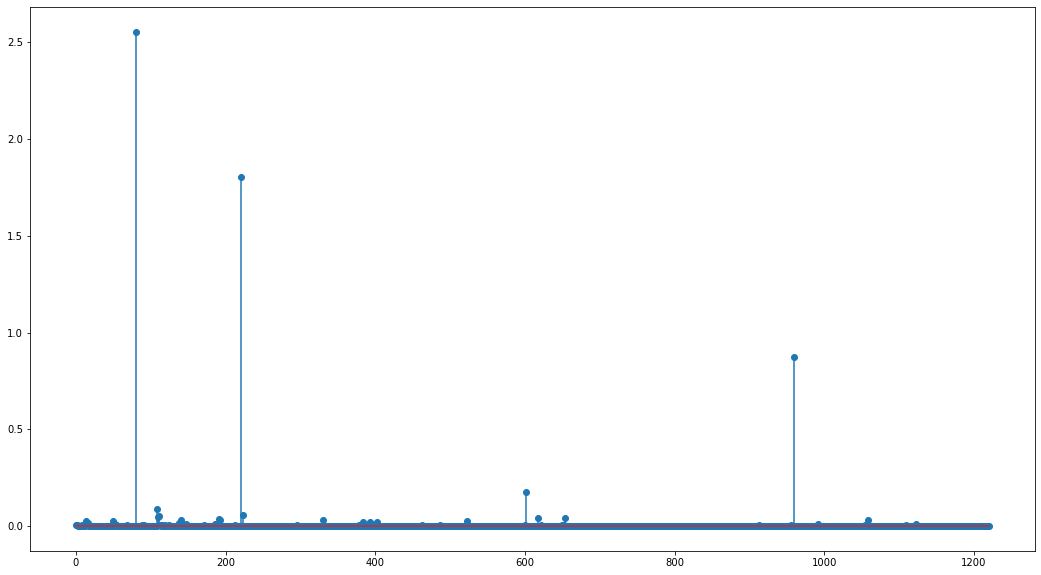

In [254]:
#ploting stem plot using cooks distance

plt.figure(figsize=(18,10))
plt.stem(np.arange(len(train_data)),np.round(c,3))
plt.show()

In [255]:
#find the poitn with highest cooks distance 
(np.argmax(c),np.max(c))

(80, 2.5526544219221763)

## the same inference can be drawn using influence plot

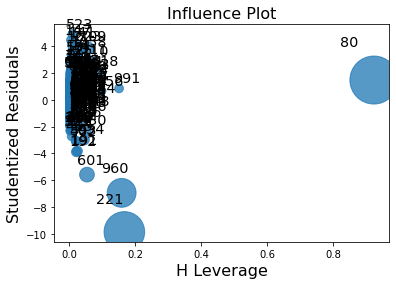

In [256]:
influence_plot(toyota_price_pred)
plt.show()

In [257]:
#calculate leverage cut off= 3*((col+1)/rows)

c = train_data.shape[1]
r = train_data.shape[0]
cutoff = 3*((c+1)/r)
cutoff

#so all the data points above cutoff are infulencial. points .. data points 80

0.02702702702702703

In [258]:
#deleting these  data points

train_data[train_data.index.isin([80])]

,Price,Age_08_04,KM,Fuel_Type,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,-1.664402,-1.293942,0.354336,4.117038,33.997687,1.014941,-0.140425,0.313211,2.043609


In [259]:
train_data = train_data.drop(train_data.index[[80]],axis=0).reset_index()

In [260]:
#deleting old index
train_data = train_data.drop(['index'],axis=1)
train_data.head()

,Price,Age_08_04,KM,Fuel_Type,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,-1.771966,-0.574695,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
1,13750,-1.771966,0.117454,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
2,13950,-1.718184,-0.715386,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
3,14950,-1.610620,-0.547650,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
4,13750,-1.395491,-0.801028,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.853577


In [261]:
#creating a new model with this new data

toyota_price_pred2 = ols(formula='Price~Age_08_04+KM+Fuel_Type+Automatic+cc+Doors+Gears+Quarterly_Tax+Weight',
                        data=train_data).fit()

In [262]:
model_influence2 = toyota_price_pred2.get_influence()

(c,_) = model_influence2.cooks_distance

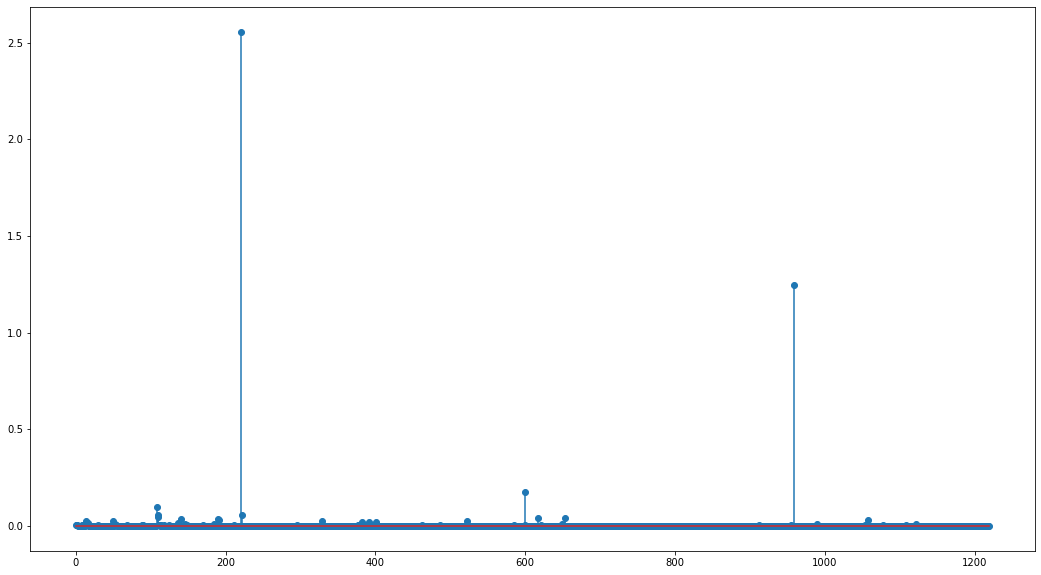

In [263]:
#ploting stem plot using cooks distance

plt.figure(figsize=(18,10))
plt.stem(np.arange(len(train_data)),np.round(c,3))
plt.show()

In [264]:
#find the poitn with highest cooks distance 
(np.argmax(c),np.max(c))

(220, 2.5547382309594946)

In [265]:
#deleting these  data points

train_data[train_data.index.isin([220])]

,Price,Age_08_04,KM,Fuel_Type,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
220,12450,-0.64254,0.150393,0.354336,-0.242893,0.054555,1.014941,-0.140425,1.845525,10.309989


In [266]:
train_data = train_data.drop(train_data.index[[220]],axis=0).reset_index()

In [267]:
#deleting old index
train_data = train_data.drop(['index'],axis=1)
train_data.head()

,Price,Age_08_04,KM,Fuel_Type,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,-1.771966,-0.574695,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
1,13750,-1.771966,0.117454,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
2,13950,-1.718184,-0.715386,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
3,14950,-1.610620,-0.547650,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
4,13750,-1.395491,-0.801028,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.853577


In [268]:
#creating a new model with this new data

toyota_price_pred3 = ols(formula='Price~Age_08_04+KM+Fuel_Type+Automatic+cc+Doors+Gears+Quarterly_Tax+Weight',
                        data=train_data).fit()

In [269]:
model_influence3 = toyota_price_pred3.get_influence()

(c,_) = model_influence3.cooks_distance

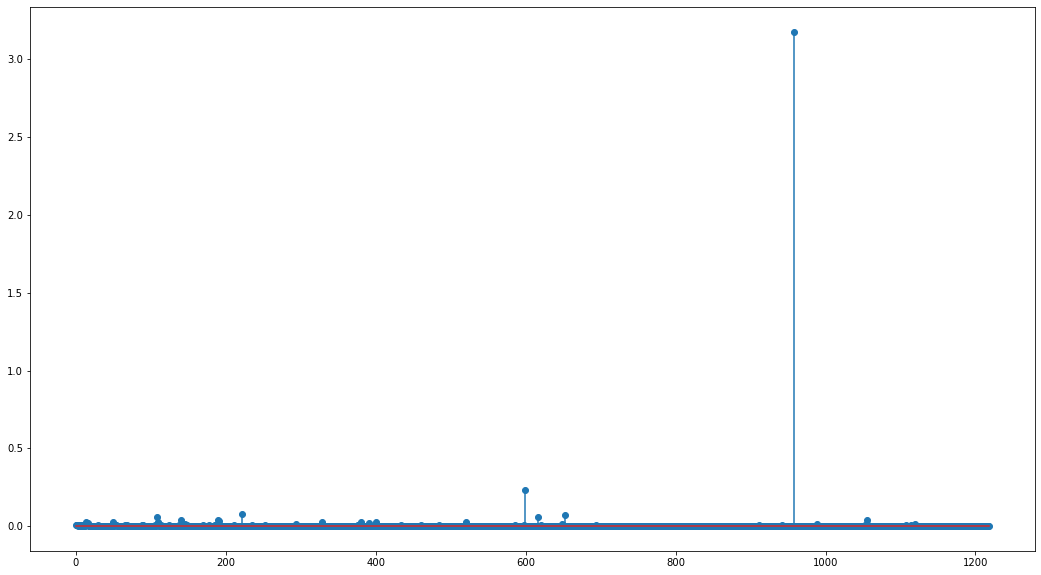

In [270]:
#ploting stem plot using cooks distance

plt.figure(figsize=(18,10))
plt.stem(np.arange(len(train_data)),np.round(c,3))
plt.show()

In [271]:
#find the poitn with highest cooks distance 
(np.argmax(c),np.max(c))

(958, 3.176572759812637)

In [273]:
#deleting these  data points

train_data[train_data.index.isin([958])]

,Price,Age_08_04,KM,Fuel_Type,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
958,9390,0.540668,-0.47281,0.354336,-0.242893,-0.652594,-1.085139,-0.140425,-1.656907,7.744561


In [274]:
train_data = train_data.drop(train_data.index[[958]],axis=0).reset_index()

In [275]:
#deleting old index
train_data = train_data.drop(['index'],axis=1)
train_data.head()

,Price,Age_08_04,KM,Fuel_Type,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,-1.771966,-0.574695,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
1,13750,-1.771966,0.117454,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
2,13950,-1.718184,-0.715386,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
3,14950,-1.610620,-0.547650,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.758561
4,13750,-1.395491,-0.801028,-2.337868,-0.242893,0.997419,-1.085139,-0.140425,2.98868,1.853577


In [276]:
#creating a new model with this new data

toyota_price_pred4 = ols(formula='Price~Age_08_04+KM+Fuel_Type+Automatic+cc+Doors+Gears+Quarterly_Tax+Weight',
                        data=train_data).fit()

In [277]:
model_influence4 = toyota_price_pred4.get_influence()

(c,_) = model_influence4.cooks_distance

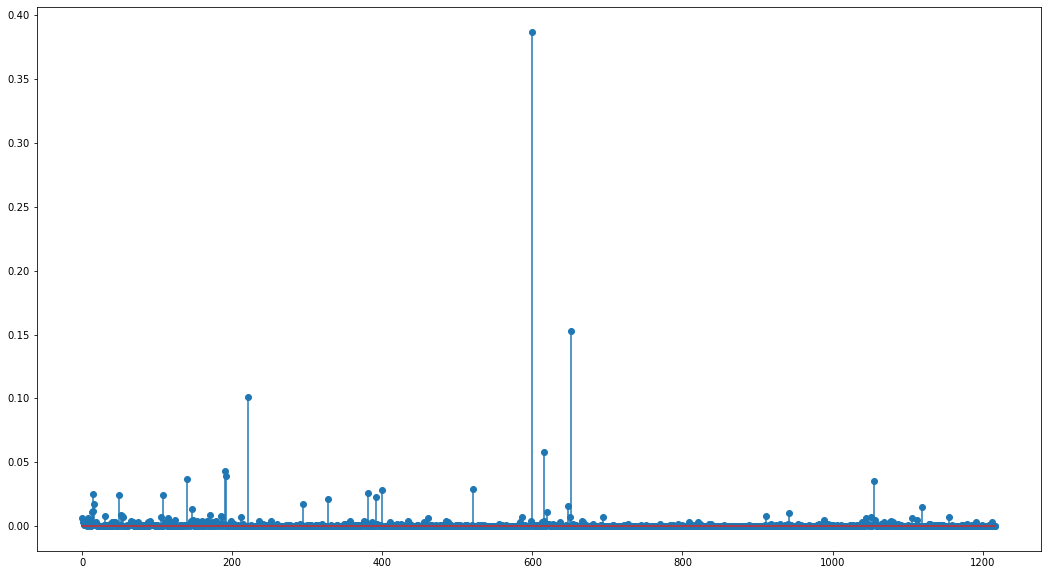

In [278]:
#ploting stem plot using cooks distance

plt.figure(figsize=(18,10))
plt.stem(np.arange(len(train_data)),np.round(c,3))
plt.show()

In [279]:
#find the poitn with highest cooks distance 
(np.argmax(c),np.max(c))

(599, 0.38685435965914666)

#### the cooks distance is less than 1 we can stop improvisation process now

## Best model creation
## 1.Model bulding and training

In [280]:
Corolla_price_pred = ols(formula='Price~Age_08_04+KM+Fuel_Type+Automatic+cc+Doors+Gears+Quarterly_Tax+Weight',
                        data=train_data).fit()

## 2.Model testing

In [281]:
y_pred = Corolla_price_pred.predict(test_data.iloc[:,1:])

In [284]:
Corolla_price_pred.rsquared_adj

0.8821822527978498

In [286]:
mean_absolute_percentage_error(test_data['Price'],y_pred)

0.10489415872409333

## Model deployment

In [289]:
dump(Corolla_price_pred,open('Corolla_price_pred.pkl','wb'))